In [1]:
%matplotlib inline

In [2]:
import matplotlib
import pandas

In [3]:
writes = pandas.read_csv("bw-write.64threads.2104100.live.csv")
writes.head()

,Label,Phase,RuntimeMS,Rank,MixType,Done%,DoneBytes,MiB/s,IOPS,Entries,Entries/s,Active,CPU,Service,Unnamed: 14
0,NaN,WRITE,250,Total,NaN,0,19766968320,75405,603240,0,0,256,38,NaN,NaN
1,NaN,WRITE,500,Total,NaN,2,47124185088,104359,834876,0,0,256,52,NaN,NaN
2,NaN,WRITE,750,Total,NaN,3,74494902272,104411,835288,0,0,256,52,NaN,NaN
3,NaN,WRITE,1000,Total,NaN,4,101800083456,104161,833288,0,0,256,52,NaN,NaN
4,NaN,WRITE,1250,Total,NaN,5,129322844160,104991,839928,0,0,256,52,NaN,NaN


In [4]:
reads = pandas.read_csv("bw-read.64threads.2104101.live.csv")
reads.head()

,Label,Phase,RuntimeMS,Rank,MixType,Done%,DoneBytes,MiB/s,IOPS,Entries,Entries/s,Active,CPU,Service,Unnamed: 14
0,NaN,READ,250,Total,NaN,0,446562304,1703,13628,0,0,256,41,NaN,NaN
1,NaN,READ,500,Total,NaN,0,13631225856,50295,402364,0,0,256,50,NaN,NaN
2,NaN,READ,750,Total,NaN,1,30310400000,63626,509008,0,0,256,45,NaN,NaN
3,NaN,READ,1000,Total,NaN,2,45152862208,56619,452956,0,0,256,42,NaN,NaN
4,NaN,READ,1250,Total,NaN,2,60379758592,58086,464688,0,0,256,46,NaN,NaN


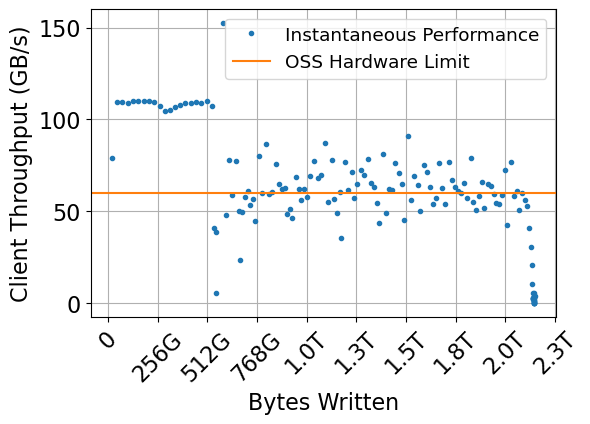

In [28]:
writes_filt = (writes["Phase"] == "WRITE") & (writes["Rank"] == "Total")
fig, ax = matplotlib.pyplot.subplots()
ax.plot(
    writes[writes_filt]["DoneBytes"] / 10**9, # bytes -> GB
    writes[writes_filt]["MiB/s"] * 2**20 / 10**9, # MiB -> GB
    marker='.',
    linestyle="none",
    label="Instantaneous Performance")
ax.set_xlabel("Bytes Written")
ax.set_ylabel("Client Throughput (GB/s)")

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=256.0))
ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, y: "{:.0f}{}".format(x, "G" if x > 0 else "") if x < 1024 else "{:.1f}T".format(x/1000)))
ax.tick_params(axis="x", labelrotation=45)

ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())

# ax.plot([4 * 256, 4 * 256], ax.get_ylim(), label="Client DRAM")
ax.plot(ax.get_xlim(), [60, 60], label="OSS Hardware Limit")

ax.legend(fontsize="smaller")

ax.grid()
ax.set_axisbelow(True)

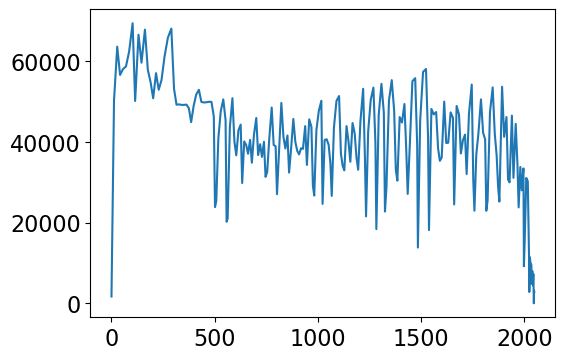

In [23]:
reads_filt = (reads["Phase"] == "READ") & (reads["Rank"] == "Total")
fig, ax = matplotlib.pyplot.subplots()
ax.plot(
    reads[reads_filt]["DoneBytes"] / 2**30,
    reads[reads_filt]["MiB/s"])